In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm, metrics, linear_model



In [49]:
import pandas as pd
Final_Dataset_Provider_Train = pd.read_csv('/content/Final_Dataset_Provider_Train.csv')
Final_Dataset_Provider_Test = pd.read_csv('/content/Final_Dataset_Provider_Test.csv')

In [50]:
Final_Dataset_Provider_Train.shape

(5410, 240)

In [51]:
Final_Dataset_Provider_Train['PotentialFraud'].replace(to_replace=['Yes','No'], value=[1,0], inplace=True)


In [52]:
Final_Dataset_Provider_Train.head(5)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,0.0,30.0,61,50225,125,50225,...,1872.124752,34.488500,79.928594,128.360407,16.0,9.0,21.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,0.0,382.0,617,265187,804,265188,...,9752.142258,248.575108,465.823969,662.905082,78.0,54.0,107.0,24.0,0.0,1.0
2,PRV51004,0,52170,310.0,0.0,0.0,362,299341,926,299341,...,10975.369856,45.457451,392.930581,690.434231,103.0,46.0,120.0,24.0,5.0,0.0
3,PRV51005,1,280910,3700.0,0.0,0.0,2433,2340483,7376,2340485,...,85836.366022,189.910839,2914.730682,5369.285209,654.0,511.0,893.0,262.0,10.0,0.0
4,PRV51007,0,33710,3264.0,0.0,19.0,141,144648,448,144648,...,5304.497707,35.451045,201.410628,337.941920,38.0,34.0,58.0,14.0,0.0,0.0


In [53]:
Final_Dataset_Provider_Train.head(5)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,0.0,30.0,61,50225,125,50225,...,1872.124752,34.488500,79.928594,128.360407,16.0,9.0,21.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,0.0,382.0,617,265187,804,265188,...,9752.142258,248.575108,465.823969,662.905082,78.0,54.0,107.0,24.0,0.0,1.0
2,PRV51004,0,52170,310.0,0.0,0.0,362,299341,926,299341,...,10975.369856,45.457451,392.930581,690.434231,103.0,46.0,120.0,24.0,5.0,0.0
3,PRV51005,1,280910,3700.0,0.0,0.0,2433,2340483,7376,2340485,...,85836.366022,189.910839,2914.730682,5369.285209,654.0,511.0,893.0,262.0,10.0,0.0
4,PRV51007,0,33710,3264.0,0.0,19.0,141,144648,448,144648,...,5304.497707,35.451045,201.410628,337.941920,38.0,34.0,58.0,14.0,0.0,0.0


In [54]:
# Seperate dependent and independent variables
x_train = Final_Dataset_Provider_Train.drop(axis=1,columns=['Provider','PotentialFraud'])
y_train = Final_Dataset_Provider_Train['PotentialFraud']
x_test = Final_Dataset_Provider_Test.drop(axis=1,columns=['Provider'])

In [55]:
# ref : https://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_standerizaed = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_trai, x_te, y_trai, y_te = train_test_split(x_train_standerizaed, y_train, test_size=0.3,random_state=42,stratify=y_train)

In [57]:
x_trai.shape ,x_te.shape , y_trai.shape , y_te.shape

((3787, 238), (1623, 238), (3787,), (1623,))

In [58]:
no_count = y_trai.value_counts()[0]
yes_count = y_trai.value_counts()[1]

fraud_percentage = (yes_count*100/(no_count+yes_count))
non_fraud_percentage = (no_count*100/(no_count+yes_count))

print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 9.35% and Non-Fraud Percentage = 90.65%


In [59]:
from collections import Counter


# **MODEL WITH 80:20 SPLIT**

In [63]:
# write the code for 80:20 ratio spilitting 
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.80 / (0.80 + 0.20), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 44.44% and Non-Fraud Percentage = 55.56%


In [64]:
from sklearn.metrics import roc_auc_score, roc_curve

# Define the base learners
lr = LogisticRegression(C=100, penalty='l2', max_iter=10000, random_state=42)
rf = RandomForestClassifier(n_estimators=52, max_depth=20, min_samples_split=4, 
                            min_samples_leaf=1, max_features='auto', bootstrap=False, random_state=42)
xgb = XGBClassifier(n_estimators=52, max_depth=33, learning_rate=0.6432882184423532, gamma=0.3881699262065219, 
                    min_child_weight=3, subsample=0.9414648087765252, colsample_bytree=0.575474177875879, random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=500, random_state=42)

svm_rbf = SVC(C=10, kernel='rbf',probability=True)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb), ('dt', dt), ('svm_rbf', svm_rbf)],
    voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(x_train_res, y_train_res)

# Predict on the testing data
y_pred = voting_clf.predict_proba(x_te)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC score of ensemble model:", roc_auc)

# Calculate the ROC curve and find the best threshold
fpr, tpr, thresholds = roc_curve(y_te, y_pred)
J = tpr - fpr
best_threshold = thresholds[np.argmax(J)]
print("Best threshold value:", best_threshold)

# Convert the probabilities to binary predictions using the best threshold
y_pred_final = (y_pred > best_threshold).astype(int)

# Evaluate the f1 score of the ensemble model
f1 = f1_score(y_te, y_pred_final, average='macro')
print("F1 score of ensemble model:", f1)

ROC AUC score of ensemble model: 0.9371489140935273
Best threshold value: 0.3011153311275109
F1 score of ensemble model: 0.7446491635403811


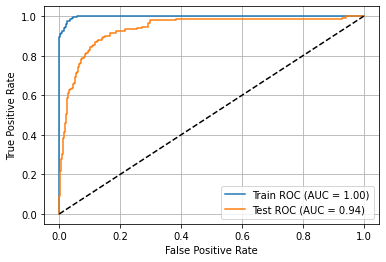

Test Confusion Matrix:
[[1369  102]
 [  36  116]]


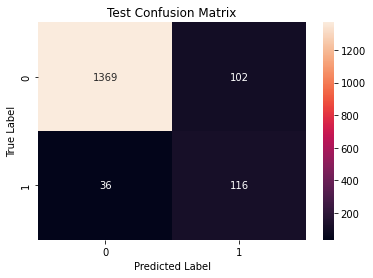

Train Confusion Matrix:
[[3321  112]
 [  63 2683]]


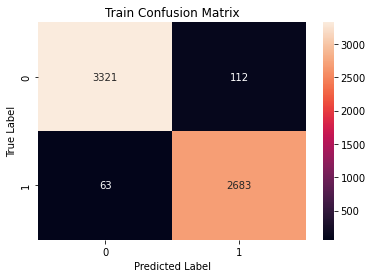

Test Precision: 0.53
Test Recall: 0.76
Test Confusion Matrix:
[[1369  102]
 [  36  116]]

Train Precision: 0.96
Train Recall: 0.98
Train Confusion Matrix:
[[3321  112]
 [  63 2683]]


In [65]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = voting_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = voting_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Predict the labels of the test set
y_test_pred = voting_clf.predict(x_te)

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_te, y_test_pred)

# Print the confusion matrix for the test set
print("Test Confusion Matrix:")
print(cm_test)

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

# Predict the labels of the training set
y_train_pred = voting_clf.predict(x_train_res)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train_res, y_train_pred)

# Print the confusion matrix for the training set
print("Train Confusion Matrix:")
print(cm_train)

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Train Confusion Matrix')
plt.show()

# Compute precision and recall for the test set
precision = precision_score(y_te, y_test_pred)
recall = recall_score(y_te, y_test_pred)

# Print precision, recall, and confusion matrix for the test set
print("Test Precision: {:.2f}".format(precision))
print("Test Recall: {:.2f}".format(recall))
print("Test Confusion Matrix:")
print(cm_test)

# Compute precision and recall for the training set
precision = precision_score(y_train_res, y_train_pred)
recall = recall_score(y_train_res, y_train_pred)

# Print precision, recall, and confusion matrix for the training set
print("\nTrain Precision: {:.2f}".format(precision))
print("Train Recall: {:.2f}".format(recall))
print("Train Confusion Matrix:")
print(cm_train)

# **MODEL WITH 70 :30 SPLIT**

In [66]:
# write the code for 70:30 ratio spilitting 
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.70 / (0.70 + 0.30), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 41.18% and Non-Fraud Percentage = 58.82%


In [67]:

from sklearn.metrics import roc_auc_score, roc_curve

# Define the base learners
lr = LogisticRegression(C=100, penalty='l2', max_iter=10000, random_state=42)
rf = RandomForestClassifier(n_estimators=52, max_depth=20, min_samples_split=4, 
                            min_samples_leaf=1, max_features='auto', bootstrap=False, random_state=42)
xgb = XGBClassifier(n_estimators=52, max_depth=33, learning_rate=0.6432882184423532, gamma=0.3881699262065219, 
                    min_child_weight=3, subsample=0.9414648087765252, colsample_bytree=0.575474177875879, random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=500, random_state=42)

svm_rbf = SVC(C=10, kernel='rbf',probability=True)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb), ('dt', dt), ('svm_rbf', svm_rbf)],
    voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(x_train_res, y_train_res)

# Predict on the testing data
y_pred = voting_clf.predict_proba(x_te)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC score of ensemble model:", roc_auc)

# Calculate the ROC curve and find the best threshold
fpr, tpr, thresholds = roc_curve(y_te, y_pred)
J = tpr - fpr
best_threshold = thresholds[np.argmax(J)]
print("Best threshold value:", best_threshold)

# Convert the probabilities to binary predictions using the best threshold
y_pred_final = (y_pred > best_threshold).astype(int)

# Evaluate the f1 score of the ensemble model
f1 = f1_score(y_te, y_pred_final, average='macro')
print("F1 score of ensemble model:", f1)

ROC AUC score of ensemble model: 0.9375245983756127
Best threshold value: 0.2739924834177807
F1 score of ensemble model: 0.7496864137970332


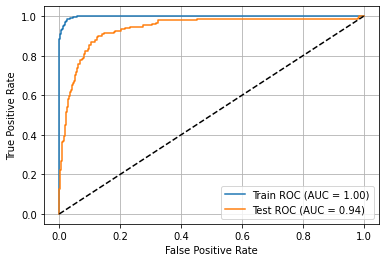

Test Confusion Matrix:
[[1372   99]
 [  35  117]]


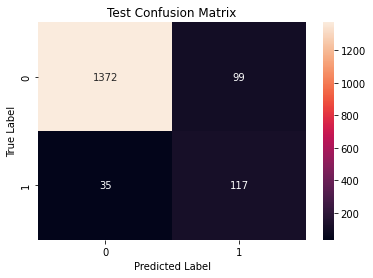

Train Confusion Matrix:
[[3345   88]
 [  42 2361]]


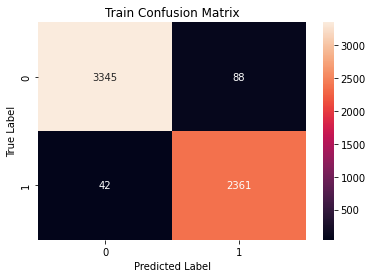

Test Precision: 0.54
Test Recall: 0.77
Test Confusion Matrix:
[[1372   99]
 [  35  117]]

Train Precision: 0.96
Train Recall: 0.98
Train Confusion Matrix:
[[3345   88]
 [  42 2361]]


In [68]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = voting_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = voting_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Predict the labels of the test set
y_test_pred = voting_clf.predict(x_te)

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_te, y_test_pred)

# Print the confusion matrix for the test set
print("Test Confusion Matrix:")
print(cm_test)

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

# Predict the labels of the training set
y_train_pred = voting_clf.predict(x_train_res)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train_res, y_train_pred)

# Print the confusion matrix for the training set
print("Train Confusion Matrix:")
print(cm_train)

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Train Confusion Matrix')
plt.show()

# Compute precision and recall for the test set
precision = precision_score(y_te, y_test_pred)
recall = recall_score(y_te, y_test_pred)

# Print precision, recall, and confusion matrix for the test set
print("Test Precision: {:.2f}".format(precision))
print("Test Recall: {:.2f}".format(recall))
print("Test Confusion Matrix:")
print(cm_test)

# Compute precision and recall for the training set
precision = precision_score(y_train_res, y_train_pred)
recall = recall_score(y_train_res, y_train_pred)

# Print precision, recall, and confusion matrix for the training set
print("\nTrain Precision: {:.2f}".format(precision))
print("Train Recall: {:.2f}".format(recall))
print("Train Confusion Matrix:")
print(cm_train)

# **MODEL WITH 75:25 SPLIT**

In [69]:
# write the code for 75:25 ratio spilitting 
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.75 / (0.75 + 0.25), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 42.85% and Non-Fraud Percentage = 57.15%


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Define the base learners
lr = LogisticRegression(C=100, penalty='l2', max_iter=10000, random_state=42)
rf = RandomForestClassifier(n_estimators=52, max_depth=20, min_samples_split=4, 
                            min_samples_leaf=1, max_features='auto', bootstrap=False, random_state=42)
xgb = XGBClassifier(n_estimators=52, max_depth=33, learning_rate=0.6432882184423532, gamma=0.3881699262065219, 
                    min_child_weight=3, subsample=0.9414648087765252, colsample_bytree=0.575474177875879, random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=500, random_state=42)

svm_rbf = SVC(C=10, kernel='rbf',probability=True)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb), ('dt', dt), ('svm_rbf', svm_rbf)],
    voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(x_train_res, y_train_res)

# Predict on the testing data
y_pred = voting_clf.predict_proba(x_te)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC score of ensemble model:", roc_auc)

# Calculate the ROC curve and find the best threshold
fpr, tpr, thresholds = roc_curve(y_te, y_pred)
J = tpr - fpr
best_threshold = thresholds[np.argmax(J)]
print("Best threshold value:", best_threshold)

# Convert the probabilities to binary predictions using the best threshold
y_pred_final = (y_pred > best_threshold).astype(int)

# Evaluate the f1 score of the ensemble model
f1 = f1_score(y_te, y_pred_final, average='macro')
print("F1 score of ensemble model:", f1)

In [ ]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = voting_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = voting_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Predict the labels of the test set
y_test_pred = voting_clf.predict(x_te)

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_te, y_test_pred)

# Print the confusion matrix for the test set
print("Test Confusion Matrix:")
print(cm_test)

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

# Predict the labels of the training set
y_train_pred = voting_clf.predict(x_train_res)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train_res, y_train_pred)

# Print the confusion matrix for the training set
print("Train Confusion Matrix:")
print(cm_train)

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Train Confusion Matrix')
plt.show()

# Compute precision and recall for the test set
precision = precision_score(y_te, y_test_pred)
recall = recall_score(y_te, y_test_pred)

# Print precision, recall, and confusion matrix for the test set
print("Test Precision: {:.2f}".format(precision))
print("Test Recall: {:.2f}".format(recall))
print("Test Confusion Matrix:")
print(cm_test)

# Compute precision and recall for the training set
precision = precision_score(y_train_res, y_train_pred)
recall = recall_score(y_train_res, y_train_pred)

# Print precision, recall, and confusion matrix for the training set
print("\nTrain Precision: {:.2f}".format(precision))
print("Train Recall: {:.2f}".format(recall))
print("Train Confusion Matrix:")
print(cm_train)

# **MODEL WITH 65:35 SPLIT**

In [72]:
# write the code for 65:35 ratio spilitting 
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.65 / (0.65 + 0.35), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 39.39% and Non-Fraud Percentage = 60.61%


In [73]:

from sklearn.metrics import roc_auc_score, roc_curve

# Define the base learners
lr = LogisticRegression(C=100, penalty='l2', max_iter=10000, random_state=42)
rf = RandomForestClassifier(n_estimators=52, max_depth=20, min_samples_split=4, 
                            min_samples_leaf=1, max_features='auto', bootstrap=False, random_state=42)
xgb = XGBClassifier(n_estimators=52, max_depth=33, learning_rate=0.6432882184423532, gamma=0.3881699262065219, 
                    min_child_weight=3, subsample=0.9414648087765252, colsample_bytree=0.575474177875879, random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=500, random_state=42)

svm_rbf = SVC(C=10, kernel='rbf',probability=True)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb), ('dt', dt), ('svm_rbf', svm_rbf)],
    voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(x_train_res, y_train_res)

# Predict on the testing data
y_pred = voting_clf.predict_proba(x_te)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC score of ensemble model:", roc_auc)

# Calculate the ROC curve and find the best threshold
fpr, tpr, thresholds = roc_curve(y_te, y_pred)
J = tpr - fpr
best_threshold = thresholds[np.argmax(J)]
print("Best threshold value:", best_threshold)

# Convert the probabilities to binary predictions using the best threshold
y_pred_final = (y_pred > best_threshold).astype(int)

# Evaluate the f1 score of the ensemble model
f1 = f1_score(y_te, y_pred_final, average='macro')
print("F1 score of ensemble model:", f1)

ROC AUC score of ensemble model: 0.9361113098858634
Best threshold value: 0.4124327229044911
F1 score of ensemble model: 0.7851829126656119


In [ ]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = voting_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = voting_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Predict the labels of the test set
y_test_pred = voting_clf.predict(x_te)

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_te, y_test_pred)

# Print the confusion matrix for the test set
print("Test Confusion Matrix:")
print(cm_test)

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

# Predict the labels of the training set
y_train_pred = voting_clf.predict(x_train_res)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train_res, y_train_pred)

# Print the confusion matrix for the training set
print("Train Confusion Matrix:")
print(cm_train)

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Train Confusion Matrix')
plt.show()

# Compute precision and recall for the test set
precision = precision_score(y_te, y_test_pred)
recall = recall_score(y_te, y_test_pred)

# Print precision, recall, and confusion matrix for the test set
print("Test Precision: {:.2f}".format(precision))
print("Test Recall: {:.2f}".format(recall))
print("Test Confusion Matrix:")
print(cm_test)

# Compute precision and recall for the training set
precision = precision_score(y_train_res, y_train_pred)
recall = recall_score(y_train_res, y_train_pred)

# Print precision, recall, and confusion matrix for the training set
print("\nTrain Precision: {:.2f}".format(precision))
print("Train Recall: {:.2f}".format(recall))
print("Train Confusion Matrix:")
print(cm_train)

# **MODEL WITH 60:40**

In [75]:
# write the code for 60:40 ratio spilitting 
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.60 / (0.60 + 0.40), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 37.49% and Non-Fraud Percentage = 62.51%


In [76]:
from sklearn.metrics import roc_auc_score, roc_curve

# Define the base learners
lr = LogisticRegression(C=100, penalty='l2', max_iter=10000, random_state=42)
rf = RandomForestClassifier(n_estimators=52, max_depth=20, min_samples_split=4, 
                            min_samples_leaf=1, max_features='auto', bootstrap=False, random_state=42)
xgb = XGBClassifier(n_estimators=52, max_depth=33, learning_rate=0.6432882184423532, gamma=0.3881699262065219, 
                    min_child_weight=3, subsample=0.9414648087765252, colsample_bytree=0.575474177875879, random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=500, random_state=42)

svm_rbf = SVC(C=10, kernel='rbf',probability=True)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb), ('dt', dt), ('svm_rbf', svm_rbf)],
    voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(x_train_res, y_train_res)

# Predict on the testing data
y_pred = voting_clf.predict_proba(x_te)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC score of ensemble model:", roc_auc)

# Calculate the ROC curve and find the best threshold
fpr, tpr, thresholds = roc_curve(y_te, y_pred)
J = tpr - fpr
best_threshold = thresholds[np.argmax(J)]
print("Best threshold value:", best_threshold)

# Convert the probabilities to binary predictions using the best threshold
y_pred_final = (y_pred > best_threshold).astype(int)

# Evaluate the f1 score of the ensemble model
f1 = f1_score(y_te, y_pred_final, average='macro')
print("F1 score of ensemble model:", f1)

ROC AUC score of ensemble model: 0.9400694121435471
Best threshold value: 0.3199730395846212
F1 score of ensemble model: 0.772145819188213


In [ ]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = voting_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = voting_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Predict the labels of the test set
y_test_pred = voting_clf.predict(x_te)

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_te, y_test_pred)

# Print the confusion matrix for the test set
print("Test Confusion Matrix:")
print(cm_test)

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

# Predict the labels of the training set
y_train_pred = voting_clf.predict(x_train_res)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train_res, y_train_pred)

# Print the confusion matrix for the training set
print("Train Confusion Matrix:")
print(cm_train)

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Train Confusion Matrix')
plt.show()

# Compute precision and recall for the test set
precision = precision_score(y_te, y_test_pred)
recall = recall_score(y_te, y_test_pred)

# Print precision, recall, and confusion matrix for the test set
print("Test Precision: {:.2f}".format(precision))
print("Test Recall: {:.2f}".format(recall))
print("Test Confusion Matrix:")
print(cm_test)

# Compute precision and recall for the training set
precision = precision_score(y_train_res, y_train_pred)
recall = recall_score(y_train_res, y_train_pred)

# Print precision, recall, and confusion matrix for the training set
print("\nTrain Precision: {:.2f}".format(precision))
print("Train Recall: {:.2f}".format(recall))
print("Train Confusion Matrix:")
print(cm_train)

# **MODEL WITH 50:50 SPLIT**

In [ ]:
# write the code for 50:50 ratio spilitting 
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.50 / (0.50 + 0.50), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Define the base learners
lr = LogisticRegression(C=100, penalty='l2', max_iter=10000, random_state=42)
rf = RandomForestClassifier(n_estimators=52, max_depth=20, min_samples_split=4, 
                            min_samples_leaf=1, max_features='auto', bootstrap=False, random_state=42)
xgb = XGBClassifier(n_estimators=52, max_depth=33, learning_rate=0.6432882184423532, gamma=0.3881699262065219, 
                    min_child_weight=3, subsample=0.9414648087765252, colsample_bytree=0.575474177875879, random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=500, random_state=42)

svm_rbf = SVC(C=10, kernel='rbf',probability=True)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('xgb', xgb), ('dt', dt), ('svm_rbf', svm_rbf)],
    voting='soft')

# Fit the voting classifier on the training data
voting_clf.fit(x_train_res, y_train_res)

# Predict on the testing data
y_pred = voting_clf.predict_proba(x_te)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC score of ensemble model:", roc_auc)

# Calculate the ROC curve and find the best threshold
fpr, tpr, thresholds = roc_curve(y_te, y_pred)
J = tpr - fpr
best_threshold = thresholds[np.argmax(J)]
print("Best threshold value:", best_threshold)

# Convert the probabilities to binary predictions using the best threshold
y_pred_final = (y_pred > best_threshold).astype(int)

# Evaluate the f1 score of the ensemble model
f1 = f1_score(y_te, y_pred_final, average='macro')
print("F1 score of ensemble model:", f1)


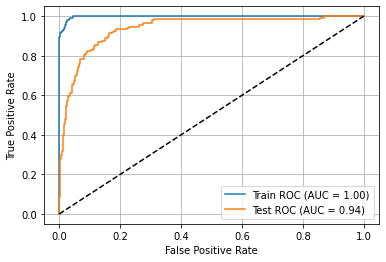

Test Confusion Matrix:
[[1381   90]
 [  41  111]]


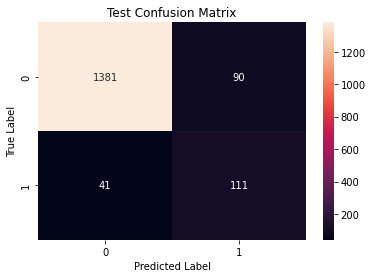

Train Confusion Matrix:
[[3352   81]
 [  47 1669]]


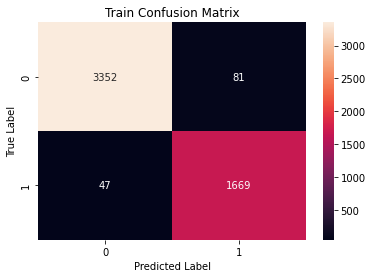

Test Precision: 0.55
Test Recall: 0.73
Test Confusion Matrix:
[[1381   90]
 [  41  111]]

Train Precision: 0.95
Train Recall: 0.97
Train Confusion Matrix:
[[3352   81]
 [  47 1669]]


In [80]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = voting_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = voting_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Predict the labels of the test set
y_test_pred = voting_clf.predict(x_te)

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_te, y_test_pred)

# Print the confusion matrix for the test set
print("Test Confusion Matrix:")
print(cm_test)

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

# Predict the labels of the training set
y_train_pred = voting_clf.predict(x_train_res)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train_res, y_train_pred)

# Print the confusion matrix for the training set
print("Train Confusion Matrix:")
print(cm_train)

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Train Confusion Matrix')
plt.show()

# Compute precision and recall for the test set
precision = precision_score(y_te, y_test_pred)
recall = recall_score(y_te, y_test_pred)

# Print precision, recall, and confusion matrix for the test set
print("Test Precision: {:.2f}".format(precision))
print("Test Recall: {:.2f}".format(recall))
print("Test Confusion Matrix:")
print(cm_test)

# Compute precision and recall for the training set
precision = precision_score(y_train_res, y_train_pred)
recall = recall_score(y_train_res, y_train_pred)

# Print precision, recall, and confusion matrix for the training set
print("\nTrain Precision: {:.2f}".format(precision))
print("Train Recall: {:.2f}".format(recall))
print("Train Confusion Matrix:")
print(cm_train)